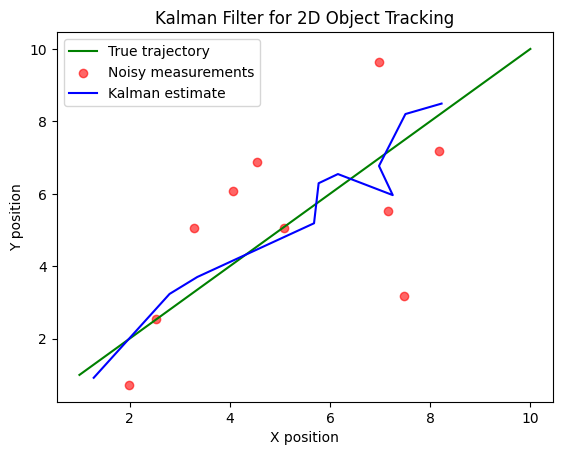

In [ ]:
#kalman filtering in 2d
import numpy as np
import matplotlib.pyplot as plt

# Time step
dt = 1.0

# Define Kalman filter matrices
F = np.array([[1, 0, dt, 0],  # State transition matrix
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
H = np.array([[1, 0, 0, 0],  # Measurement matrix
              [0, 1, 0, 0]])
Q = np.eye(4) * 0.01        # Process noise covariance
R = np.eye(2) * 5           # Measurement noise covariance
P = np.eye(4)               # Initial state covariance

# Initial state: [x_position, y_position, x_velocity, y_velocity]
x = np.array([[0], [0], [1], [1]])

# Simulated measurements (noisy positions)
np.random.seed(42)
true_positions = np.cumsum(np.array([[1, 1]] * 10), axis=0)  # True trajectory
measurements = true_positions + np.random.normal(0, 2, true_positions.shape)

# Kalman filter functions
def predict(x, P):
    x = F @ x
    P = F @ P @ F.T + Q
    return x, P

def update(x, P, z):
    y = z - (H @ x)  # Measurement residual
    S = H @ P @ H.T + R  # Residual covariance
    K = P @ H.T @ np.linalg.inv(S)  # Kalman gain
    x = x + K @ y  # Update state estimate
    P = (np.eye(len(P)) - K @ H) @ P  # Update covariance estimate
    return x, P

# Run Kalman filter
estimated_positions = []
for z in measurements:
    z = z.reshape(2, 1)  # Measurement as column vector
    x, P = predict(x, P)  # Prediction step
    x, P = update(x, P, z)  # Update step
    estimated_positions.append(x[:2].flatten())

# Plot results
estimated_positions = np.array(estimated_positions)
plt.plot(true_positions[:, 0], true_positions[:, 1], label="True trajectory", color="g")
plt.scatter(measurements[:, 0], measurements[:, 1], label="Noisy measurements", color="r", alpha=0.6)
plt.plot(estimated_positions[:, 0], estimated_positions[:, 1], label="Kalman estimate", color="b")
plt.legend()
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Kalman Filter for 2D Object Tracking")
plt.show()

In [ ]:
#kalman filtering in 1D
import numpy as np

# Initialize variables
dt = 1.0  # Time step (seconds)

# Define matrices
F = np.array([[1, dt],  # State transition matrix
              [0, 1]])

H = np.array([[1, 0]])  # Measurement matrix
Q = np.array([[0.1, 0], # Process noise covariance
              [0, 0.1]])
R = np.array([[1]])     # Measurement noise covariance
P = np.eye(2)           # Initial state covariance

# Initial state [position, velocity]
x = np.array([[0],      # Initial position
              [0]])     # Initial velocity

# Kalman filter functions
def predict(x, P):
    """Prediction step."""
    x = F @ x
    P = F @ P @ F.T + Q
    return x, P

def update(x, P, z):
    """Update step."""
    y = z - (H @ x)  # Measurement residual
    S = H @ P @ H.T + R  # Residual covariance
    K = P @ H.T @ np.linalg.inv(S)  # Kalman gain
    x = x + K @ y  # Update state estimate
    P = (np.eye(len(P)) - K @ H) @ P  # Update covariance estimate
    return x, P

# Simulate measurements (noisy position observations)
measurements = [1, 2, 3, 4, 5]  # Example measurements
estimated_positions = []

# Apply Kalman filter
for z in measurements:
    z = np.array([[z]])  # Measurement as a column vector
    x, P = predict(x, P)  # Prediction step
    x, P = update(x, P, z)  # Update step
    estimated_positions.append(x[0, 0])  # Save estimated position

# Print results
print("Estimated positions:", estimated_positions)

Estimated positions: [0.6774193548387097, 1.6875, 2.7827486866632776, 3.8633346054008713, 4.920738244216875]
